<a href="https://colab.research.google.com/github/Flor-Si/Trabajos/blob/main/TP15-Notebook_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

En esta notebook, vamos a demostrar como funcionan los algoritmos vistos en clase y su implementación en Scikit-learn.

In [2]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
data, target = load_iris(return_X_y=True, as_frame=True)

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Tenemos que si pertenece o no a un tipo de flores
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [6]:
X = np.array(data)
y = np.array(target)

In [7]:
#Nombre de las variables

feature_names = data.columns

# Random Forest

[Documentacion](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
#Queremos crear un rander foreste que tenga un criterio de entropy y maximo de features
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='sqrt')

In [10]:
#Realizamos un fit para aplicar a las variables
rf.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [11]:
#Con una instacian de 5
estimator = rf.estimators_[5]

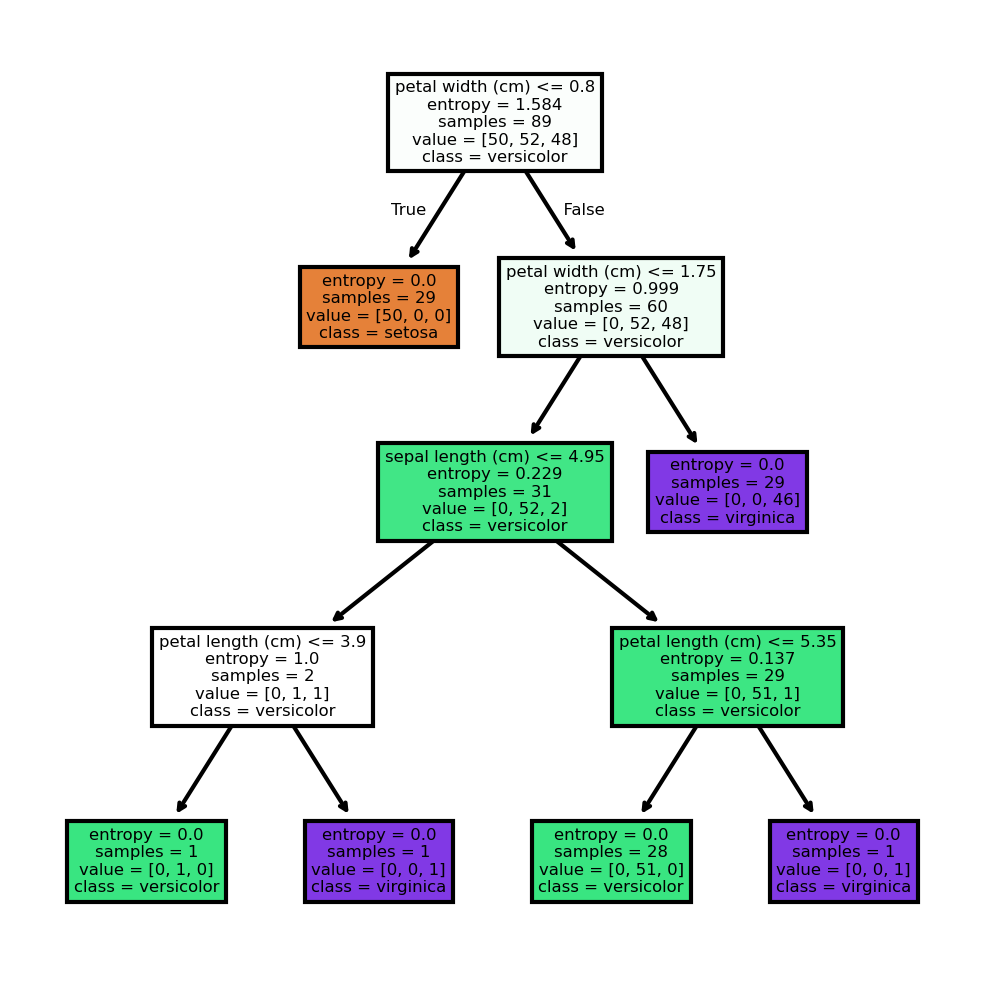

In [12]:
#Graficamos una imagen con distintos ejes 4 rectangulos y tamaño dpi 300
#que nos muestre el nombre , clase
#Modelo que me muestra la logica que aplica
#Primer pregunta si el largo del petalo mayor a 2,5 y la entropya 1,5 la sample o muestra es 94 y los valores y clase "SI se cumple" es TRUE Entropya "0"
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)

plot_tree(rf[0],
          feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],
          class_names=['setosa', 'versicolor', 'virginica'],
          filled = True);


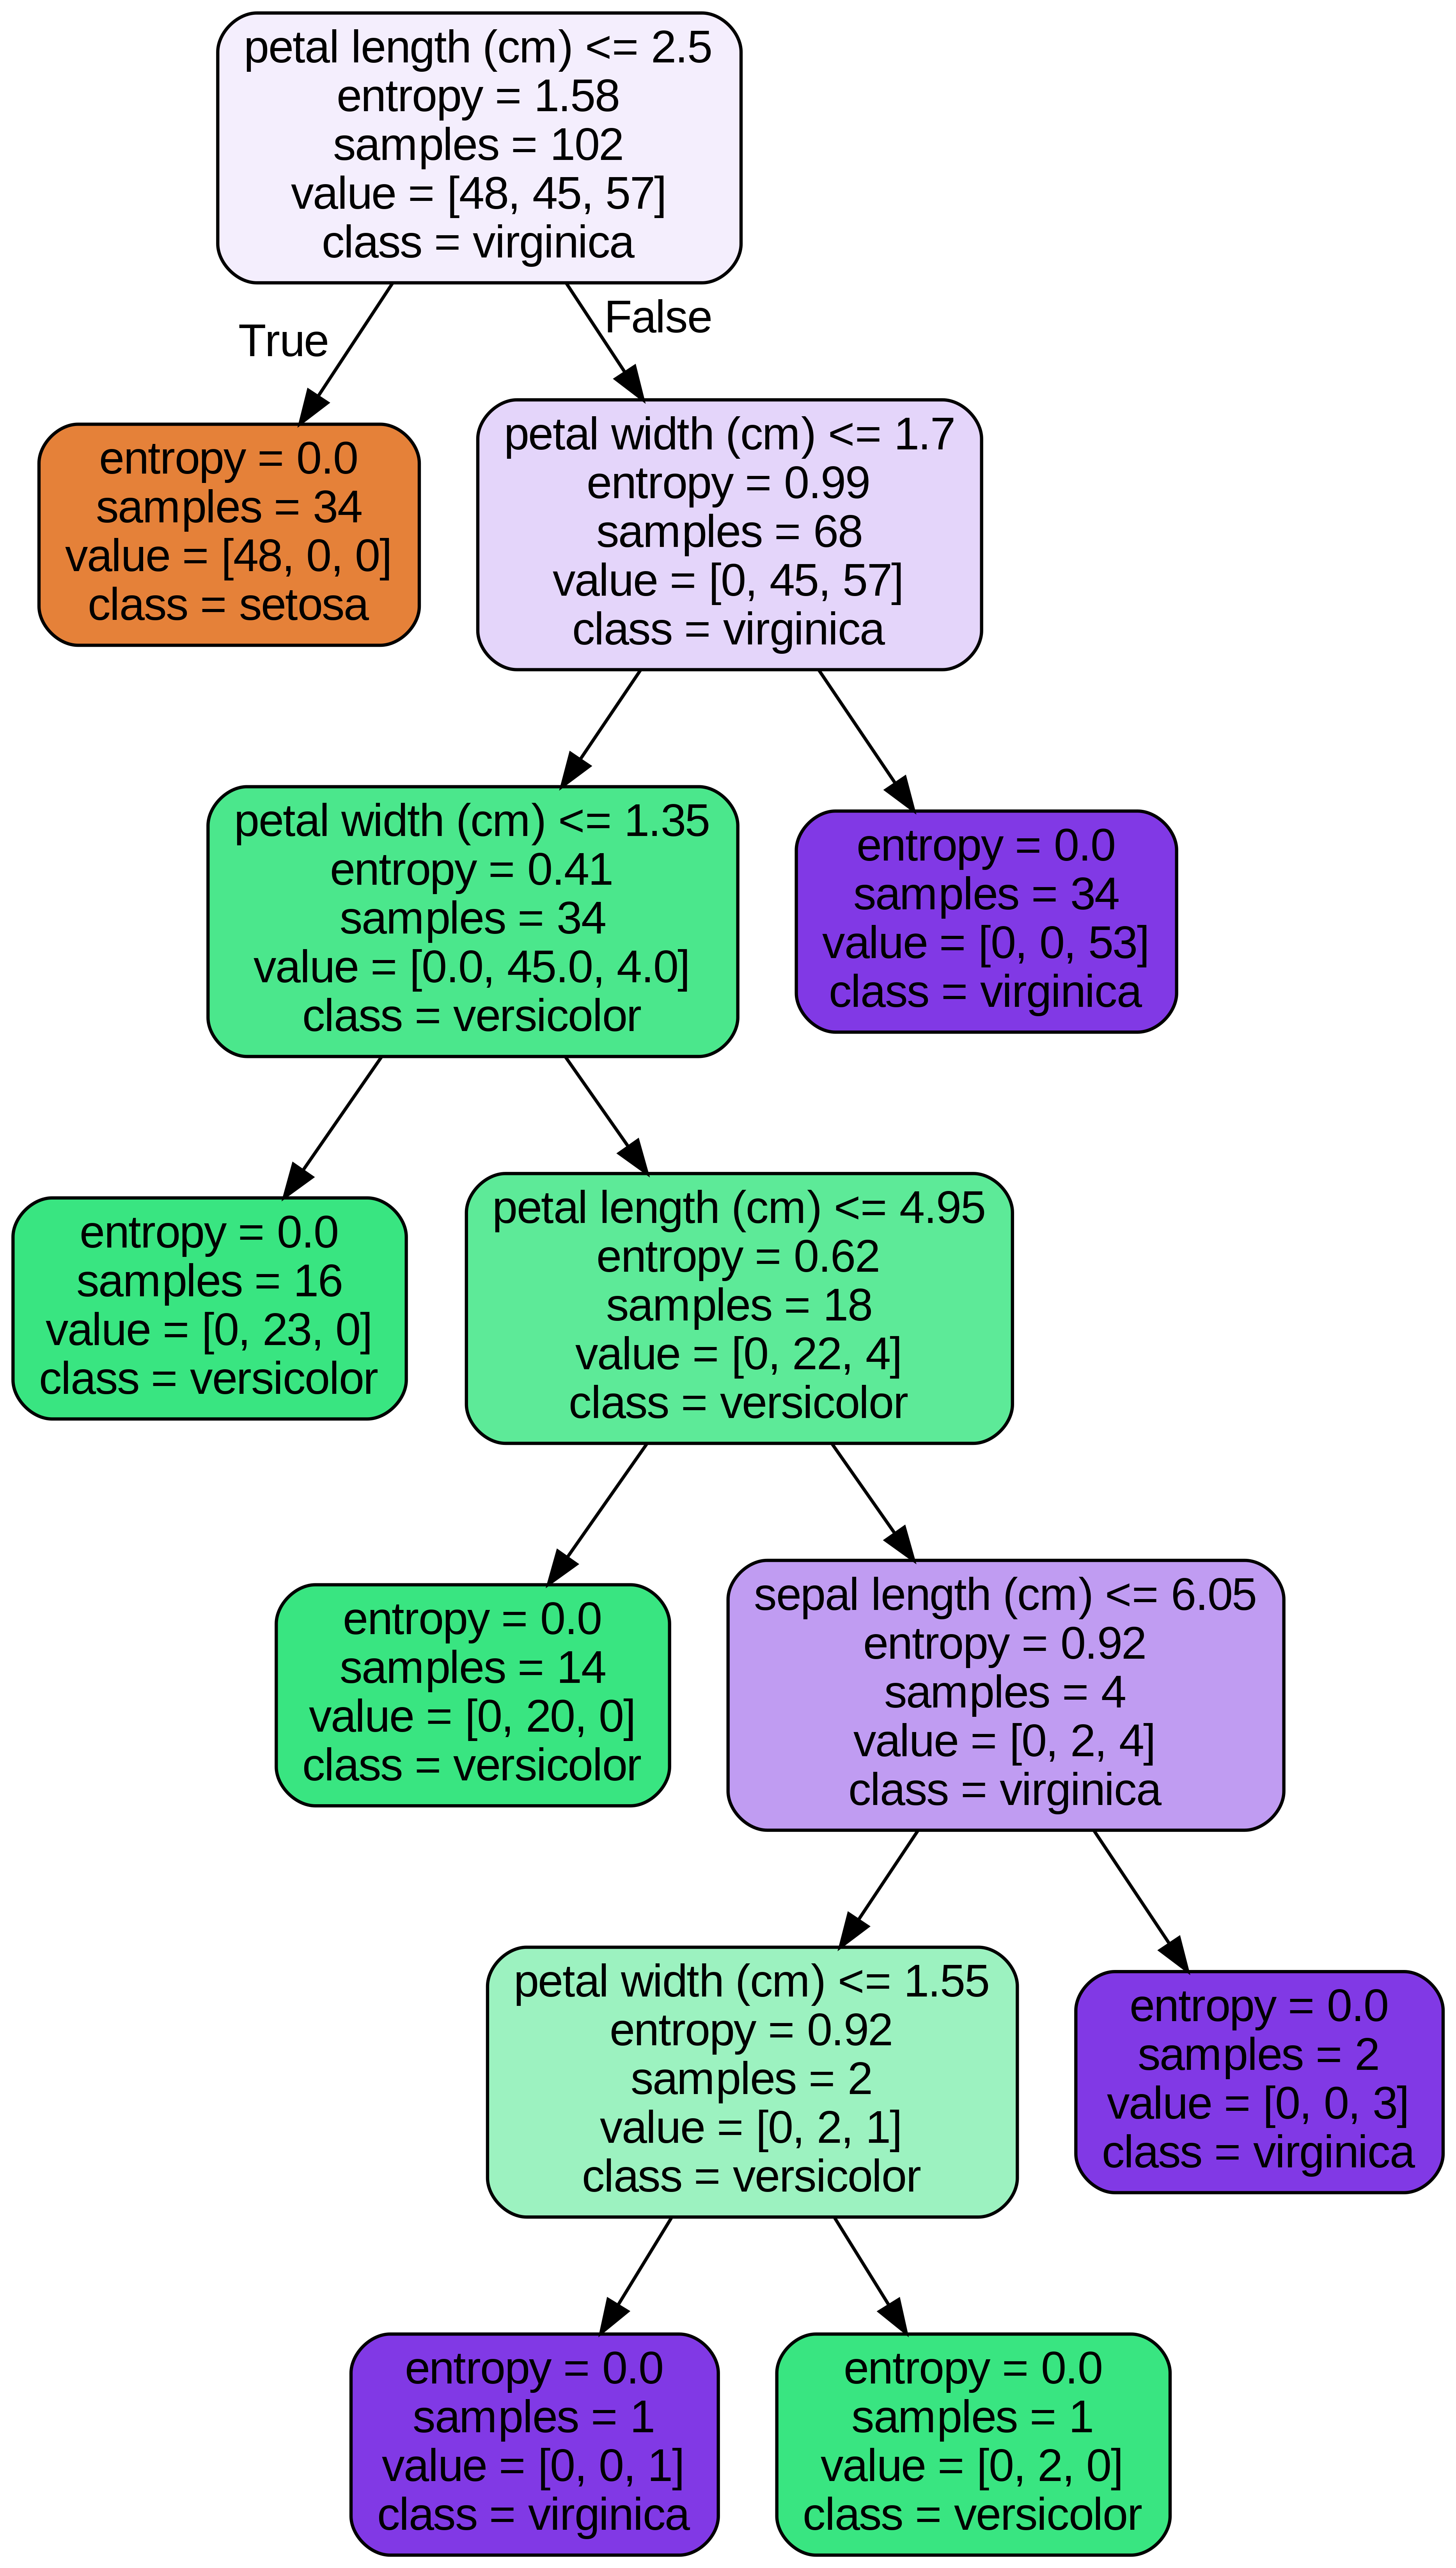

In [14]:
#Utilizamos arboles de desicioón que nos permite exportar otro arbol pero con otro tipo de grafco
#Colores formas, clases que flores que utiliza si le queremos dar más presición si deja valores decimales
from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='tree.dot',
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

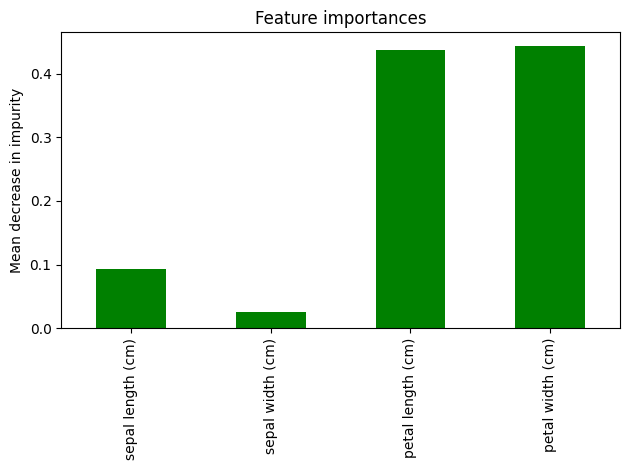

In [31]:
#El eje y tenemos el promedio del increcimiento de la impureza .. Nos van a adar nodos mas puros y el ancho del cepalo
#La importamcia de los features que la importamcia de cada uno si van preguntando los no puros .
#Es el camino más corto

importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, color='green')
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Support Vector Machine

In [17]:
from sklearn.svm import SVC, LinearSVC

In [18]:
X_ir = data.iloc[: ,[0, 2]]

In [19]:
#Entrenamos para que aprenda con solo nuestros valores acotados que le colocamos arriba
sup_vector = SVC()

In [20]:
sup_vector.fit(X_ir, y)

SVC()

In [21]:
#Vemos que queda guardado en el vector los valores
sup_vector.support_vectors_

array([[4.3, 1.1],
       [5.7, 1.7],
       [5.1, 1.7],
       [4.8, 1.9],
       [5.1, 1.9],
       [7. , 4.7],
       [6.9, 4.9],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [6.1, 4.7],
       [5.6, 4.5],
       [6.2, 4.5],
       [5.9, 4.8],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [5.5, 4.4],
       [6.1, 4.6],
       [5. , 3.3],
       [5.1, 3. ],
       [5.8, 5.1],
       [4.9, 4.5],
       [6.5, 5.1],
       [6.4, 5.3],
       [5.7, 5. ],
       [5.8, 5.1],
       [6.4, 5.3],
       [7.7, 6.9],
       [6. , 5. ],
       [5.6, 4.9],
       [6.3, 4.9],
       [6.2, 4.8],
       [6.1, 4.9],
       [7.9, 6.4],
       [6.3, 5.1],
       [6. , 4.8],
       [6.9, 5.4],
       [6.9, 5.1],
       [5.8, 5.1],
       [6.7, 5.2],
       [6.3, 5. ],
       [6.5, 5.2],
       [5.9, 5.1]])

In [22]:
#Genero la sea un grafico líneal
sup_linear = LinearSVC()

In [23]:
sup_linear.fit(X_ir, y)

LinearSVC()

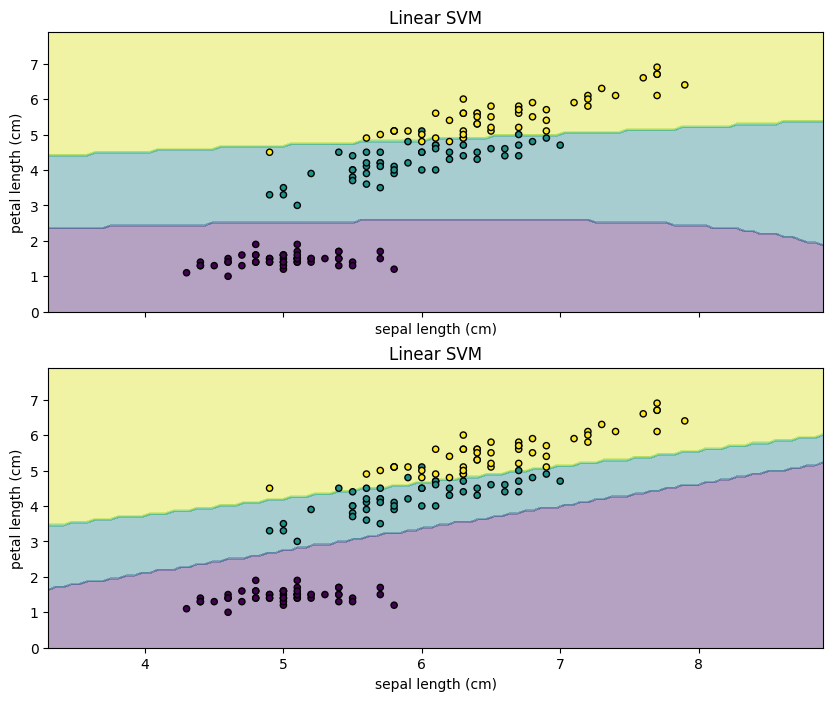

In [24]:
#Acá vamos a ver la grafica de
#Importamos las herramientas
#graficamos con Subplots
#Que nos dibujen con la función predeccion
#con la segunda parte le ponemos las colors para darle belleza

from sklearn.inspection import DecisionBoundaryDisplay
from itertools import product

f, ax = plt.subplots(2, 1, sharex="col", sharey="row", figsize=(10, 8))


DecisionBoundaryDisplay.from_estimator(
    sup_vector, X_ir, alpha=0.4, ax=ax[0], response_method="predict")
ax[0].scatter(X_ir.iloc[:, 0], X_ir.iloc[:, 1], c=y, s=20, edgecolor="k")
ax[0].set_title('Linear SVM')

DecisionBoundaryDisplay.from_estimator(
    sup_linear, X_ir, alpha=0.4, ax=ax[1], response_method="predict")
ax[1].scatter(X_ir.iloc[:, 0], X_ir.iloc[:, 1], c=y, s=20, edgecolor="k")
ax[1].set_title('Linear SVM')

plt.show()

# kNN

In [27]:
#Vemos el comportaiento de los vecinos
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(X_ir, y)

KNeighborsClassifier()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


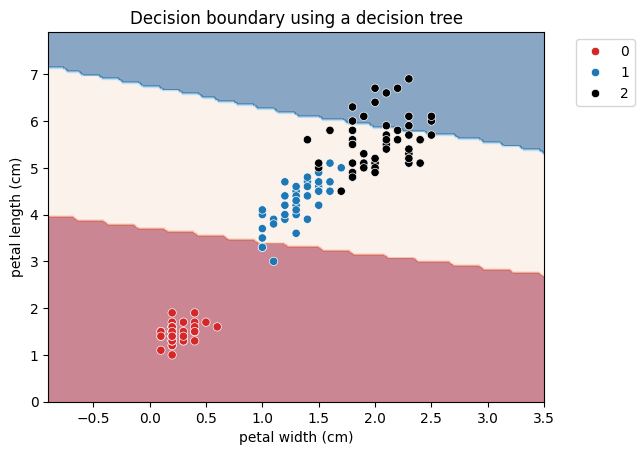

In [30]:
#Vemos la grafica le agregamos una columna nueva que lo tenmos de importar el dataset
#utiliza em metodo de prediccion con el cemap
#Nos clasifica con el KNN
palette = ["tab:red", "tab:blue", "black"]
columns = ['petal width (cm)', 'petal length (cm)']
data_all = data.copy()
data_all['target_column'] = y

DecisionBoundaryDisplay.from_estimator(
    knn, np.array(data[columns]), response_method="predict", cmap="RdBu", alpha=0.5
)
ax = sns.scatterplot(data=data_all, x=columns[0], y=columns[1],
                     hue='target_column', palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree")